<a href="https://colab.research.google.com/github/Leeyounghun94/AIStudy24/blob/master/%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어 평가를 진행하는데 근데 결국 테스트세트로 평가를 하면 테스트세트에 맞는 모델이 만들어 지는 결론이 나온다.

테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 한 테스트세트를 사용하지 말아야 한다.

모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

결정트리에서 max_depth 매개변수를 사용한 하이퍼 파라미터 튜닝을 해보자.



> 고정된 학습데이터와 테스트데이터로 평가하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있는 편향되게 모델을 유도하는 경우가 생기게되는데 이는 테스트 데이터만 과적합 되는 학습 모델이 만들어서 다른 테스트용 모델이 들어올 경우 성능이 저하된다. 이러한 문제점을 개선하고자 **교차 검증**을 이용한다.



> 교차 검증은 데이터 편중을 막기 위한 별도의 세트로 구성된 학습 데이터와 검증 데이터 세트에서 학습과 평가를 수행하는것




In [4]:
# 검증 세트
# 테스트 세트를 사용하지 않으려면 모델이 과대적합인지 과소적합인지 판단하기가 어렵다.
# 테스트 세트를 사용하지 않고 측정하는 간단한 방법은 훈련세트를 또 나누는 것이다.
# 훈련세트 60% + 검증세트 20% + 테스트세트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있다.
# 이 매개변수를 사용해서 훈련세트와 검증세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련한다.
# 마지막 테스트에서 최종 점수를 평가한다.
# 훈련세트에서 모델을 훈련하고 검증 세트로 모델을 평가한다.
# 마지막 세트에서 테스트 세트를 이용해 최종 점수를 평가한다.

In [5]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
# 훈련세트, 테스트세트 나눔
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)   # 20%
# 원본데이터가 아마 6,497개 였는데 여기서 0.2 = train(5197), test(1300)

# 검증 세트 20% 생성
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)
# 원래 5197개 였던 훈련세트가 4,157개로 줄어들고, 검증세트가 1,040개가 됨

(4157, 3) (1040, 3)


In [6]:
# sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가한다.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)   # 훈련

print(dt.score(sub_input, sub_target))      # 0.9971133028626413 = 99.71% (과대적합)
print(dt.score(val_input, val_target))      # 0.864423076923077 = 86.44%
# 과대적합이 나오므로 매개변수를 바꿔서 더 좋은 모델을 찾아야 한다.

0.9971133028626413
0.864423076923077


In [7]:
# 검증세트를 만든다고 훈련세트가 줄어들었다.(이럴 때 많은 데이터를 훈련하면 좋은 결과가 나온다.)
# 교차 검증 : 검증 세트를 떼어 내어 평가하는 과정으 여러번 반복한다.

# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식(3-폴드 교차 검증)
# 5, 10-폴드도 있다.
# 사이킷런에는 cross_validate()라는 교차 검증 함수를 사용함

In [8]:
from sklearn.model_selection import cross_validate
# 평가할 모델 객체를 첫번째 매개변수로 전달함(직접 검증세트를 떼지 않고 훈련세트 전체를 전달한다.)
scores = cross_validate(dt, train_input, train_target)
# scores = cross_validate(dt, train_input, train_target, cv=5)
# cv 매개변수를 이용하여 폴드 수를 변경함 cv = 5(기본값)
print(scores)

#fit_time(훈련시간), score_time(검증시간), test_score(최종점수) 키를 가진 딕셔너리(k : v)를 반환함

{'fit_time': array([0.00878906, 0.01067877, 0.0089879 , 0.01003337, 0.00903392]), 'score_time': array([0.00136781, 0.00150561, 0.00151706, 0.00146675, 0.00141311]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [9]:
# {'fit_time': array([0.01324701, 0.01193213, 0.01240635, 0.01280236, 0.01191068]),
#  'score_time': array([0.00207019, 0.00193715, 0.00214982, 0.00226355, 0.00193691]),
#  'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [10]:
import numpy as np

print(np.mean(scores['test_score'])) # test_score 이름이지만 검증 폴드의 점수이다.
# 5개의 검증 점수를 평균을 내어 최종 점수를 얻는다. 85.53%

0.855300214703487


In [11]:
# 주의 : cross_validate()는 훈련세트 섞어서 폴드를 나누지 않았음 -> 분할기 사용(splitter)
# 앞서 우리는 train_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약, 교차 검증할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.

# 사이킷런의 분할기는 교차 검증에서 폴드를 어떻게 나눌지를 결정한다.
# cross_validate()는 기본적으로 회귀모델인 KFold 분할기를 사용
# 분류 모델일 경우 타깃 클래스를 골고루 나누기 위해서는 StratifiedKFold를 사용한다.

from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


* K 폴드 교차 검증
    
    : K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법


    

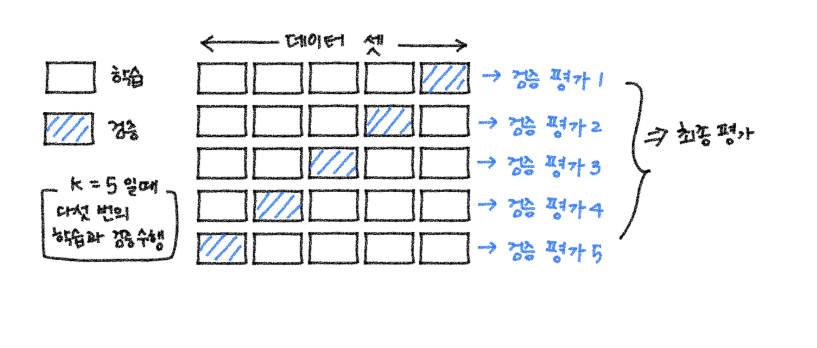


: 학습 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 5번째(k번째) 까지 학습, 검증을 수행하는 것이 K 폴드 교차 검증

* 사이킷런에서 k 폴드 교차 검증 구현하기 위해서는 KFold와 StratifiedKFold 클래스가 있다.
    - KFold 객체는 split() 호출하면 학습, 검증용 데이터로 분할할 수 있는 인덱스를 반환

    - StratifiedKFold : 불균형한 분포도 가진 레이블(결정 클래스) 데이터 집합을 위한 K폴드 방식, 불균형한 분포도 가진 레이블은 특정 레이블 값이 특이하게 많거나 매우 적어 한쪽으로 치우치는 것을 말함.
    레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결 해줌.

In [12]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-폴드 교차 검증 수행.
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [13]:
# 01.07

# 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봐야 한다.
# 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라야 한다.

# 하이퍼파라미터 튜닝
# 모델 파라미터 : 머신러닝 모델이 학습하는 파라미터
# 하이퍼 파라미터 : 사용자가 지정해야만 하는 파라미터
# 하이퍼 파라미터 튜닝 : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
# 그 다음 검증세트의 점수, 교차 검증 통해서 매개변수를 조금씩 변경 1~2, 5~6개의 매개변수를 제공
# AutoML : 사람의 개입없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술

# Max_depth 를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다면 값이 함께 변경된다.
# -> 두 개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 한다. -> 쓰는 이유(다중 for문을 사용해야 됨(복잡해짐))
# 사이킷런에서 제공하는 그리드 서치(Grid Search)가 제공, GridSearchCV



> **파라미터** : 머신러닝에서 사용되는 파라미터는 모델 파라미터 라고 함, 모델에 적용할 하나 이상의 파라미터를 사용하여 새로운 샘플에 대한 예측하기 위해 사용
- 특징
        1. 예측 모델은 새로운 샘플이 주어지면 무엇을 예측할지 결정할 수 있도록 파라미터 필요로 함
        2. 머신러닝 훈련 모델의 성능은 파라미터에 의해 결정
        3. 파라미터는 데이터로부터 추정, 학습 된다.
        4. 개발자에 의해 수동으로 설정되지 않음(임의 조정 불가능)
        5. 학습된 모델의 일부로 저장됨



> **하이퍼 파라미터** : 머신러닝 알고리즘 학습과정을 설정하기 위해 학습 전 지정되는 매개변수(파라미터) 이러한 파라미터는 모델학습과 일반화 능력에 중요한 영향 미치며 적절한 하이퍼 파라미터 값 선택하는 것이 모델 성능의 최적화하는데 필수.
- 특징
        1.모델의 매개 변수 추정하는데 도움이 되는 프로세스에 사용
        2.하이퍼파라마터는 개발자에 의해 수동으로 설정이 가능(임의 조정가능)
        3.학습 알고리즘의 샘플에 대한 일반화를 위해 조절됨.


- **하이퍼 파라미터 튜닝** : 모델을 최적화하기 위해 하이퍼 파라미터를 조정하는 과정


In [14]:
from sklearn.model_selection import GridSearchCV # 그리드서치 크로스 검증용
# min_impurity_decrease 매개변수의 최적값을 찾아보자.
# min_sample_split : 샘플을 최소한 몇 개 이상이어야 split(하위 노드로 분리) 할 것인지
#   클수록 가지치기(과대적합 방지), 작을수록 정확하기(과대적합)
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} # 0.0001 ~ 증가 5번
# ㄴ 매개변수와 탐색할 값을 리스트를 딕셔너리로 만든다.

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
# 결정 트리 클래스의 객체를 생성하자마자 바로 전달한다.
# 일반 모델을 훈련하는 것처럼 fit() 메서드를 호출한다.
# 이 메서드를 호출하면 서치 객체는 결정 트리 모델 min_impurity_decrease 값 바꿔가면서 총 5번 수행
# GridSearchCV의 cv 매개 변수 기본 값은 5, 5 * 5 = 25번 수행
# n_jobs에서 병렬 실행에 사용될 CPU 코어 수를 지정한다. (-1로 사용 시 모든 코어)

gs.fit(train_input, train_target) # 훈련시작
# 교차 검증에서 최적의 하이퍼 파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 하지만 사이킷런의 그리드 서치는 검증 점수가 가장 높은 모델의 매개변수 조합으로
# 전체 훈련 세트에서 자동으로 다시 모델을 훈련한다.

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

* **Grid Search**
        머신러닝 모델의 최적의 하이퍼 파라미터를 찾기 위한 방법 중 하나.
        지정된 하이퍼 파라미터의 모든 조합을 시도하여, 가장 좋은 성능을 내는 조합을 찾는 과정이다.

    * 장점
            1.성능 최적화 : 모델의 성능을 극대화하기 위해 최적의 하이퍼 파라미터 조합 찾을 수 있다.
            2.자동화 : 수동으로 하이퍼파라미터 조정하는 것은 시간이 많이 걸리고 비효율적, 그리드 서치로 자동화 가능
            3. 객관성 : 모든 가능한 조합을 시도하기 때문에 선택의 주관성 배제하고 객관적인 결과 얻음.


In [15]:
# 이렇게 최적화되어 훈련된 모델을 GridSearchCV 클래스로 만들어진 객체의 best_estimator_ 속성에 저장되어 있다.
# 최적의 매개변수는 best_params_ 속성에 저장되어 있다.
print(f"그리드 서치를 통해 찾은 최적의 모델의 정화도 : {dt.score(train_input, train_target)*100:.2f}%")

그리드 서치를 통해 찾은 최적의 모델의 정화도 : 97.06%


In [16]:
print(f"최적의 매개 변수 : {gs.best_params_}")

최적의 매개 변수 : {'min_impurity_decrease': 0.0001}


In [17]:
# 5번의 교차 검증으로 얻은 점수를 출력해보자.
print(gs.cv_results_['mean_test_score'])    # 0.86819297 -> 첫번째 값이 가장 큰 것 같다!

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [18]:
# 눈으로 보는 것보다 넘파이를 이용해서 argmax()함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.
# 그 다음 이 인덱스를 사용해서 params 키에 저장된 매개 변수를 출력해보자.
# 이 값이 최상의 검증 점수를 만든 매개변수의 조합이 된다.

best_index = np.argmax(gs.cv_results_['mean_test_score']) # 0.86819297
print(gs.cv_results_['params'][best_index]) # 앞에서 출력한 best_params_ 와 같은지 확인!

# 과정 요약
# 1. 탐색할 매개변수 지정
# 2. 훈련 세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾는다. -> 그리드 서치에 저장
# 3. 그리드 서치는 최상의 매개변수에서 전체 훈련 세트를 사용해 최종 모델을 훈련 -> 그리드 서치에 저장

{'min_impurity_decrease': 0.0001}


In [19]:
# 이번에는 조금 더 복잡한 매개변수 조합을 해보자.
# 노드를 분할하기 위한 불순도 감소 최소량 지정 max_depth(트리의 깊이)
# min_samples_split 노드를 나누기 위한 최소 샘플 수
# 넘파이 arange() 함수는 첫번째 매개변수 값에서 시작해서 두번째 매개변수에 도달할 때까지 세번째 매개변수를 계속 더한 배열을 만든다.
# 0.0001 ~ 0.001까지 0.0001을 더한 배열 (두번째 매개변수는 포함되지 않음) = 9번
# 파이썬 range() 함수는 정수만 사용이 가능하다 5 ~ 20까지 1씩 증가 = 15개
# 교차 검증 회수 9 * 15 * 10 = 1350개 * 5-폴드교차 = 6750개

params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),       # 9번
          'max_depth' : range(5, 20, 1),                                    # 5 ~ 20까지 15번
          'min_samples_split' : range(2, 100, 10)                           # 2 ~ 100까지 10번
          }

# criterion : 분할 품질을 측정하는 기능(default : gini)
# splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
# max_depth : 트리의 최대 깊이 (같이 클수록 모델의 복잡도가 올라간다.)
# min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
# min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default ; 1)
# min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
# max_features : 각 노드에서 분할에 사용할 특징의 최대 수
# random_state : 난수 seed 설정
# max_leaf_nodes : 리프 노드의 최대 수
# min_impurity_decrease : 최대 불순도
# min_impurity_split : 나무 성장을 멈추기 위한 임계치
# class_weight : 클래스 가중치
# presort : 데이터 정렬 필요 여부

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target) # 훈련 시작

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [20]:
print(gs.best_params_)  # 최상의 매개변수 조합확인
# {'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [21]:
print(np.max(gs.cv_results_['mean_test_score']))    # 최상의 교차 점수 확인
# 개선점 : 탐색할 매개변수 간격을 0.0001 혹은 1로 설정했는데 근거 부족(좁히거나 넓힐 필요성이 있음?)

0.8683865773302731


In [22]:
# 매개 변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기가 어려울 수 있다.
# 너무 많은 매개 변수 조건이 있어 그리드 서치 수행시간이 오래 걸린다.
# 그래서 해결으로는 랜덤 서치를 사용해보는 것.

# 랜덤 서치 : 매개변수의 값의 목록을 전달하는 것이 아닌 매개변수를 샘플링할 수 있는 확률 분포도 객체를 전달한다.
# 싸이파이 : 파이썬의 핵심 과학 라이브러리로 적분, 보간, 선형대수, 확률 등 포함한 수치 계산용 전용 라이브러리(코랩에 내장)

from scipy.stats import uniform, randint
# uniform, randit 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다. (균등 분포에서 샘플링)
# randint()에서는 정수값 추출, uniform()은 실수값 뽑는다.

In [23]:
rgen = randint(0, 10)   # 10개 숫자를 샘플링(학생마다 다름)
rgen.rvs(10)        # array([3, 0, 9, 6, 0, 1, 8, 5, 6, 4])

# 10개 밖에 되지 않기 때문에 고르게 샘플링 되는 것 같지 않지만, 샘플링 숫자를 늘리면 쉽게 확인할 수 있다.

array([3, 0, 9, 6, 0, 1, 8, 5, 6, 4])

In [29]:
np.unique(rgen.rvs(1000), return_counts=True) # 1000개를 샘플링해서 각 숫자의 개수를 세어본다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([101, 111,  99, 109,  95, 115,  84,  90,  93, 103]))

In [30]:
ugen = uniform(0, 1)    # 실수 테스트
ugen.rvs(10)    # 난수발생기(랜덤과 유사)

array([0.74274827, 0.88809647, 0.23690374, 0.64045417, 0.18079096,
       0.92273571, 0.52995056, 0.60871227, 0.55373416, 0.13876769])

In [31]:
# 탐색할 매개변수의 딕셔너리를 만들어본다.
# min_samples_leaf을 탐색 대상에 추가

params = {'min_impurity_decrease' : uniform(0.0001, 0.001),       # 0.00001 ~ 0.001의 실수값
          'max_depth' : randint(20, 50),                          # 20 ~ 50 사이의 정수
          'min_samples_split' : randint(2, 25),                   # 2 ~ 25 사이의 정수
          'min_samples_leaf' : randint(1, 25),                     # 1 ~ 25 사이의 정수
          # 리프 노드가 되기 위한 최소 샘플 개수(지식 노드의 샘플 수가 이 값보다 작으면 분???)
          }

In [32]:
# 샘플링 회수는 사이킷런의 랜덤 서치 클래스인 RandomizedSearchCV의 n_iter 매개 변수에 지정
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
# n_iter=100 총 100번을 샘플링하여 교차 검증을 수행(최적의 매개변수 조합을 찾는다.)

gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fed75d63f70>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fed75d57910>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fed75d639d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fed75d60550>},
                   random_state=42)

* RandomizedSearchCV
        RandomSearch는 하이퍼 파라미터 튜닝 방법 중 하나로 가능한 하이퍼 파라미터의 값들 중에서 무작위로 선택해서 모델을 평가하는 방식.
        GridSearch와 유사하게 추정기(estimator), 조정할 하이퍼파라미터, 각 하이퍼파라미터 값 범위를 정의하나, 모든 조합을 시도와는 달리
        무작위로 선택해서 평가함.


    * 특징
    1. 모든 하이퍼 파라미터가 모델 성능에 같은 영향을 미치지 않는다.
        특정 파라미터는 다른 것 보다 성능 향상에 더 큰 기여할 수 있음.

    2.확률적 접근 : 무작위로 선택하기 때문에 중요한 하이퍼 파라미터의 최적 조합을 더 빨리 찾을 수 있는 확률적 이점을 제공함

In [33]:
print(gs.best_params_)  # 결과, 최적의 매개변수 조합을 찾음

#   {'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [34]:
print(np.max(gs.cv_results_['mean_test_score']))    # 최고의 교차 검증 점수 확인

0.8695428296438884


In [35]:
dt = gs.best_estimator_
# 최종 모델로 결정하고 테스트 세트의 성능을 확인
print(dt.score(test_input, test_target))        # 테스트 점수 : 86% , 검증 점수 : 86.95%

0.86


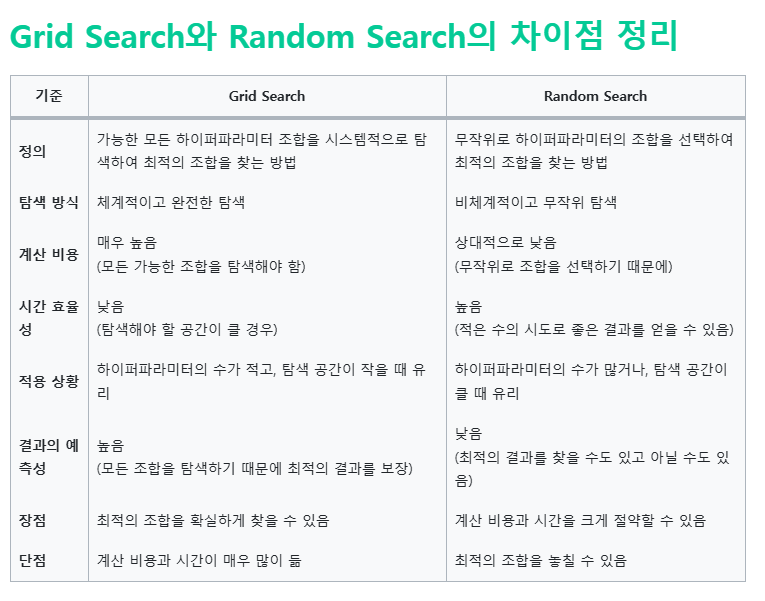